In [1]:
%matplotlib inline

import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display
import utils


%matplotlib inline

#libreries for clustering
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

import warnings 
warnings.filterwarnings('always')   #suppresses all warnings
warnings.filterwarnings('ignore')

#set seaborn style and context
sns.set_style("ticks")
sns.set_context("paper")

#visualize all columns and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
tracks = pd.read_csv("/Users/david/Desktop/DM2 project/fma_metadata/track_new.csv")

In [3]:
features= utils.load("/Users/david/Desktop/DM2 project/fma_metadata/features.csv")
feat=features[['spectral_rolloff','spectral_centroid']] 
feat=feat.droplevel(0,axis=1)
feat.columns=['roll_kurtosis','roll_max','roll_mean','roll_median','roll_min','roll_skew','roll_std',
                   'centr_kurtosis','centr_max','centr_mean','centr_median','centr_min','centr_skew','centr_std']
#cut=['roll_kurtosis','roll_max','roll_std','roll_median','roll_min','roll_skew']
#feat.drop(cut,axis=1,inplace=True)

In [4]:
tracks.head()

,track_id,genre_top
0,4850,Classical
1,4851,Classical
2,5009,Old-Time / Historic
3,5012,Old-Time / Historic
4,5013,Old-Time / Historic


In [5]:
X=pd.merge(tracks,feat, on='track_id')
X.drop('track_id',axis=1,inplace=True)

In [6]:
X.head()

,genre_top,roll_kurtosis,roll_max,roll_mean,roll_median,roll_min,roll_skew,roll_std,centr_kurtosis,centr_max,centr_mean,centr_median,centr_min,centr_skew,centr_std
0,Classical,27.346659,9517.675781,900.405640,667.529297,247.631836,5.201740,1216.515747,40.157177,5693.858887,531.164001,445.917084,249.851807,5.489871,376.292480
1,Classical,27.429146,9496.142578,724.641357,473.730469,0.000000,5.282704,1287.398682,45.221325,5715.818359,462.206146,386.870026,0.000000,5.831337,378.367340
2,Old-Time / Historic,27.219351,9431.542969,1642.593506,1431.958008,0.000000,4.298496,775.767700,29.038763,5579.080566,997.398926,933.559448,0.000000,4.048092,321.319214
3,Old-Time / Historic,7.255138,9377.709961,3055.212647,2982.348633,0.000000,1.542648,729.129150,17.429407,5512.500000,1491.275391,1410.062988,0.000000,3.420450,337.361053
4,Old-Time / Historic,64.899399,9410.009766,1606.060181,1485.791016,0.000000,7.019240,625.550781,71.632355,5511.795410,999.326538,958.825928,0.000000,6.991871,252.320953


In [7]:
X1=X.copy()
X1.head()

,genre_top,roll_kurtosis,roll_max,roll_mean,roll_median,roll_min,roll_skew,roll_std,centr_kurtosis,centr_max,centr_mean,centr_median,centr_min,centr_skew,centr_std
0,Classical,27.346659,9517.675781,900.405640,667.529297,247.631836,5.201740,1216.515747,40.157177,5693.858887,531.164001,445.917084,249.851807,5.489871,376.292480
1,Classical,27.429146,9496.142578,724.641357,473.730469,0.000000,5.282704,1287.398682,45.221325,5715.818359,462.206146,386.870026,0.000000,5.831337,378.367340
2,Old-Time / Historic,27.219351,9431.542969,1642.593506,1431.958008,0.000000,4.298496,775.767700,29.038763,5579.080566,997.398926,933.559448,0.000000,4.048092,321.319214
3,Old-Time / Historic,7.255138,9377.709961,3055.212647,2982.348633,0.000000,1.542648,729.129150,17.429407,5512.500000,1491.275391,1410.062988,0.000000,3.420450,337.361053
4,Old-Time / Historic,64.899399,9410.009766,1606.060181,1485.791016,0.000000,7.019240,625.550781,71.632355,5511.795410,999.326538,958.825928,0.000000,6.991871,252.320953


In [8]:
X1['genre_top'].value_counts()

Classical              619
Old-Time / Historic    510
Name: genre_top, dtype: int64

In [9]:
from sklearn.preprocessing import RobustScaler, LabelBinarizer
le=LabelBinarizer()
X1['genre_top']=le.fit_transform(X1['genre_top'])

In [10]:
X1['genre_top'].value_counts()

0    619
1    510
Name: genre_top, dtype: int64

In [11]:
#normalize data with Robust scaler
scaler = RobustScaler()
X_scaler = scaler.fit_transform(X1)
X_scaler

array([[ 0.        , -0.14763225,  0.23333333, ...,  0.03163695,
        -0.05182346,  0.45688883],
       [ 0.        , -0.14719538,  0.16666667, ..., -0.53214725,
         0.00354391,  0.4646364 ],
       [ 1.        , -0.14830651, -0.03333333, ..., -0.53214725,
        -0.28560193,  0.25161752],
       ...,
       [ 0.        , -0.17168979,  0.86666667, ..., -0.53214725,
        -0.01312521,  0.79478897],
       [ 0.        , -0.29337503,  0.6       , ..., -0.11412938,
        -0.79250792,  2.72539953],
       [ 0.        , -0.23861646,  0.33333333, ..., -0.53214725,
        -0.30669305,  2.30558795]])

In [12]:
from pyclustering.cluster import xmeans
from pyclustering.cluster import cluster_visualizer
from sklearn.metrics import silhouette_score

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaler)
X_pca = pca.transform(X_scaler)

# K-MEANS

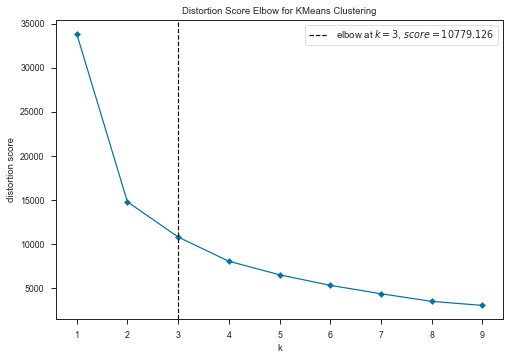

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
model=KMeans()
visualizer= KElbowVisualizer(model, k=(1,10),timings=False)

visualizer.fit(X_pca)
visualizer.show()

## K-MEANS VALIDATION

In [15]:
#calculate silhouette for different values of K
k_to_test = range(2,11,1) # [2,3,4, ..., 24]
silhouette_scores = {}

for k in k_to_test:
    model_kmeans_k = KMeans( n_clusters = k )
    model_kmeans_k.fit(X_pca)
    labels_k = model_kmeans_k.labels_
    score_k = metrics.silhouette_score(X_pca, labels_k)
    silhouette_scores[k] = score_k
    print("Tested kMeans with k = %d\tSS: %5.4f" % (k, score_k))
    
print("Done!")

Tested kMeans with k = 2	SS: 0.7189
Tested kMeans with k = 3	SS: 0.4740
Tested kMeans with k = 4	SS: 0.4899
Tested kMeans with k = 5	SS: 0.5051
Tested kMeans with k = 6	SS: 0.3759
Tested kMeans with k = 7	SS: 0.3824
Tested kMeans with k = 8	SS: 0.4024
Tested kMeans with k = 9	SS: 0.4034
Tested kMeans with k = 10	SS: 0.3493
Done!


In [16]:
#convert dict values to a list 
sil_v = []
for i in silhouette_scores.values():
    sil_v.append(i)

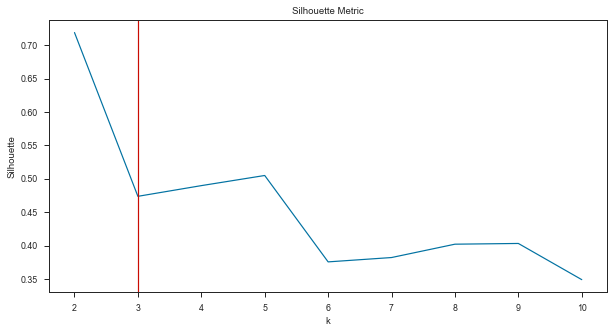

In [17]:
#Silhouette metric graph
plt.figure(figsize = (10,5))
plt.plot(sil_v)
plt.xticks(range(0,9,1), silhouette_scores.keys())
plt.title("Silhouette Metric")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.axvline(1, color = "r")
#plt.figtext(0.3,0.55,'[ K = 3 ]\n[ SS: 0.3074 ] ')
plt.show()


In [18]:
kmeans=KMeans(n_clusters=3, n_init=10, max_iter=300)
kmeans.fit(X_pca)

KMeans(n_clusters=3)

In [19]:
clusters= kmeans.labels_

In [20]:
np.unique(clusters, return_counts=True)

(array([0, 1, 2]), array([217, 100, 812], dtype=int64))

In [21]:
hist, bins = np.histogram(kmeans.labels_,
                         bins=range(0,len(set(kmeans.labels_))+1))
dict(zip(bins,hist))

{0: 217, 1: 100, 2: 812}

In [22]:
centroids=kmeans.cluster_centers_
centroids

array([[-3.29905749,  3.18475669],
       [13.1793011 ,  0.56994994],
       [-0.74142196, -0.92128965]])

In [23]:
X_km= pd.DataFrame(X_pca)

In [24]:
X_km.columns=['a','b']

In [25]:
X_km["Cluster"] = kmeans.labels_

<Figure size 720x720 with 0 Axes>

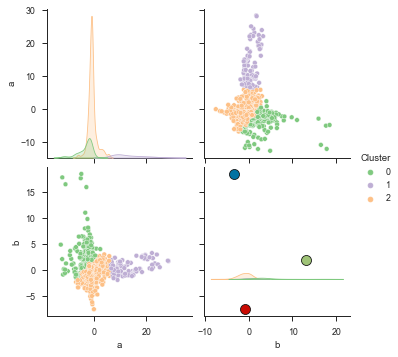

<Figure size 720x720 with 0 Axes>

In [26]:
sns.pairplot(X_km, hue='Cluster', palette='Accent')
for cen in centroids:
    plt.scatter(cen[0], cen[1], s=100, edgecolors='k')
plt.figure(figsize=(10,10))

In [27]:
X_km.columns

Index(['a', 'b', 'Cluster'], dtype='object')

Text(0.5, 1.0, 'K-Means Clustering')

<Figure size 504x360 with 0 Axes>

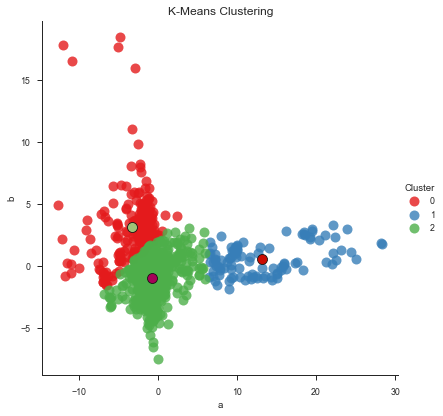

In [28]:
plt.figure(figsize=(7,5))
sns.lmplot( x='a', y='b',data=X_km ,hue='Cluster', palette='Set1',size=5.5,fit_reg =False, scatter_kws={'s':100})
for cen in centroids:
    plt.scatter(cen[0], cen[1], s=100, edgecolors='k')
plt.title('K-Means Clustering', size=12)

In [29]:
X1_km=X1.copy()
X1_km['Cluster']=kmeans.labels_

In [30]:
clas_0_km=X1_km[X1_km['genre_top']==0][X1_km["Cluster"]==0].index
clas_1_km=X1_km[X1_km['genre_top']==0][X1_km["Cluster"]==1].index
clas_2_km=X1_km[X1_km['genre_top']==0][X1_km["Cluster"]==2].index
old_0_km=X1_km[X1_km['genre_top']==1][X1_km["Cluster"]==0].index
old_1_km=X1_km[X1_km['genre_top']==1][X1_km["Cluster"]==1].index
old_2_km=X1_km[X1_km['genre_top']==1][X1_km["Cluster"]==2].index

In [31]:
print('Cluster 0: Others:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_0_km),len(old_0_km),len(old_0_km)+len(clas_0_km)))
print('Cluster 1: Others:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_1_km),len(old_1_km),len(old_1_km)+len(clas_1_km)))
print('Cluster 2: Others:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_2_km),len(old_2_km),len(old_2_km)+len(clas_2_km)))
#print('Cluster 3: Others:{},Old-Time/Historic:{}, Total of:{}'.format(len(other3),len(old3),len(old3)+len(other3)))

Cluster 0: Others:138,Old-Time/Historic:79, Total of:217
Cluster 1: Others:61,Old-Time/Historic:39, Total of:100
Cluster 2: Others:420,Old-Time/Historic:392, Total of:812


# X-Means

In [32]:
xm = xmeans.xmeans(X_pca)
xm.process()

In [33]:
np.unique(xm.get_cluster_encoding, return_counts=True)

(array([<bound method xmeans.get_cluster_encoding of <pyclustering.cluster.xmeans.xmeans object at 0x00000159A898B250>>],
       dtype=object),
 array([1], dtype=int64))

In [34]:
clusters = xm.get_clusters()
print('Number of clusters founded:',len(clusters))

Number of clusters founded: 8


In [35]:
print('Cluster 0:',len(clusters[0]))
print('Cluster 1:',len(clusters[1]))
print('Cluster 2:',len(clusters[2]))
print('Cluster 3:',len(clusters[3]))
print('Cluster 4:',len(clusters[4]))
print('Cluster 5:',len(clusters[5]))
print('Cluster 6:',len(clusters[6]))
print('Cluster 7:',len(clusters[7]))

Cluster 0: 7
Cluster 1: 218
Cluster 2: 64
Cluster 3: 616
Cluster 4: 112
Cluster 5: 60
Cluster 6: 30
Cluster 7: 22


In [36]:
X1_xm=X1.copy()
X1_xm['Cluster']= xm.get_clusters
cut=X1.iloc[:,1:]
X1_xm.drop(cut,axis=1, inplace=True)

In [37]:
c_index=X1_xm[X1_xm['genre_top']==0].index
o_index=X1_xm[X1_xm['genre_top']==1].index

In [38]:
count_0_c=0
for c in clusters[0]:
    for i in c_index:
        if c==i:
            count_0_c=count_0_c+1 
count_1_c=0
for c in clusters[1]:
    for i in c_index:
        if c==i:
            count_1_c=count_1_c+1 
count_2_c=0
for c in clusters[2]:
    for i in c_index:
        if c==i:
            count_2_c=count_2_c+1 
count_3_c=0
for c in clusters[3]:
    for i in c_index:
        if c==i:
            count_3_c=count_3_c+1 
count_4_c=0
for c in clusters[4]:
    for i in c_index:
        if c==i:
            count_4_c=count_4_c+1 
count_5_c=0
for c in clusters[5]:
    for i in c_index:
        if c==i:
            count_5_c=count_5_c+1 
count_6_c=0
for c in clusters[6]:
    for i in c_index:
        if c==i:
            count_6_c=count_6_c+1 
count_7_c=0
for c in clusters[7]:
    for i in c_index:
        if c==i:
            count_7_c=count_7_c+1 

In [39]:
print('Cluster 0: Classical {}, Old-Time {}, total of {}'.format(count_0_c,len(clusters[0])-count_0_c,len(clusters[0])))
print('Cluster 1: Classical {}, Old-Time {}, total of {}'.format(count_1_c,len(clusters[1])-count_1_c,len(clusters[1])))
print('Cluster 2: Classical {}, Old-Time {}, total of {}'.format(count_2_c,len(clusters[2])-count_2_c,len(clusters[2])))
print('Cluster 3: Classical {}, Old-Time {}, total of {}'.format(count_3_c,len(clusters[3])-count_3_c,len(clusters[3])))
print('Cluster 4: Classical {}, Old-Time {}, total of {}'.format(count_4_c,len(clusters[4])-count_4_c,len(clusters[4])))
print('Cluster 5: Classical {}, Old-Time {}, total of {}'.format(count_5_c,len(clusters[5])-count_5_c,len(clusters[5])))
print('Cluster 6: Classical {}, Old-Time {}, total of {}'.format(count_6_c,len(clusters[6])-count_6_c,len(clusters[6])))
print('Cluster 7: Classical {}, Old-Time {}, total of {}'.format(count_7_c,len(clusters[7])-count_7_c,len(clusters[7])))

Cluster 0: Classical 6, Old-Time 1, total of 7
Cluster 1: Classical 125, Old-Time 93, total of 218
Cluster 2: Classical 57, Old-Time 7, total of 64
Cluster 3: Classical 302, Old-Time 314, total of 616
Cluster 4: Classical 62, Old-Time 50, total of 112
Cluster 5: Classical 32, Old-Time 28, total of 60
Cluster 6: Classical 26, Old-Time 4, total of 30
Cluster 7: Classical 9, Old-Time 13, total of 22


In [40]:
centers = xm.get_centers()
centers

[[-5.896495459498204, 15.322095490329422],
 [-1.8502578647588275, 2.8052927216174557],
 [-6.724386846912959, 0.04184318093115483],
 [-1.151178731727127, -1.3498051066310868],
 [1.7851676147283928, 0.4328104584097884],
 [7.9611371591615265, 0.36656849403195785],
 [14.269220088626106, -0.11009183281755464],
 [21.747042482827087, 1.946698834588986]]

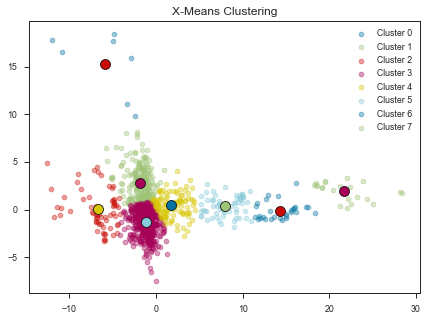

In [41]:
plt.figure(figsize=(7,5))
for indexes in clusters:
    plt.scatter(X_pca[indexes,0], X_pca[indexes,1], alpha=0.4)
for c in centers:
    plt.scatter(c[0], c[1], s=100, edgecolors='k')
plt.title('X-Means Clustering', size=12)
plt.legend(['Cluster 0','Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5','Cluster 6', 'Cluster 7'  ])

### X-Means Validation

In [42]:
xm.process

<bound method xmeans.process of <pyclustering.cluster.xmeans.xmeans object at 0x00000159A898B250>>

# Transactonal Clustering

In [89]:
X.head()

,genre_top,roll_kurtosis,roll_max,roll_mean,roll_median,roll_min,roll_skew,roll_std,centr_kurtosis,centr_max,centr_mean,centr_median,centr_min,centr_skew,centr_std
0,Classical,27.346659,9517.675781,900.405640,667.529297,247.631836,5.201740,1216.515747,40.157177,5693.858887,531.164001,445.917084,249.851807,5.489871,376.292480
1,Classical,27.429146,9496.142578,724.641357,473.730469,0.000000,5.282704,1287.398682,45.221325,5715.818359,462.206146,386.870026,0.000000,5.831337,378.367340
2,Old-Time / Historic,27.219351,9431.542969,1642.593506,1431.958008,0.000000,4.298496,775.767700,29.038763,5579.080566,997.398926,933.559448,0.000000,4.048092,321.319214
3,Old-Time / Historic,7.255138,9377.709961,3055.212647,2982.348633,0.000000,1.542648,729.129150,17.429407,5512.500000,1491.275391,1410.062988,0.000000,3.420450,337.361053
4,Old-Time / Historic,64.899399,9410.009766,1606.060181,1485.791016,0.000000,7.019240,625.550781,71.632355,5511.795410,999.326538,958.825928,0.000000,6.991871,252.320953


In [90]:
X2=X.copy()
X2.head()

,genre_top,roll_kurtosis,roll_max,roll_mean,roll_median,roll_min,roll_skew,roll_std,centr_kurtosis,centr_max,centr_mean,centr_median,centr_min,centr_skew,centr_std
0,Classical,27.346659,9517.675781,900.405640,667.529297,247.631836,5.201740,1216.515747,40.157177,5693.858887,531.164001,445.917084,249.851807,5.489871,376.292480
1,Classical,27.429146,9496.142578,724.641357,473.730469,0.000000,5.282704,1287.398682,45.221325,5715.818359,462.206146,386.870026,0.000000,5.831337,378.367340
2,Old-Time / Historic,27.219351,9431.542969,1642.593506,1431.958008,0.000000,4.298496,775.767700,29.038763,5579.080566,997.398926,933.559448,0.000000,4.048092,321.319214
3,Old-Time / Historic,7.255138,9377.709961,3055.212647,2982.348633,0.000000,1.542648,729.129150,17.429407,5512.500000,1491.275391,1410.062988,0.000000,3.420450,337.361053
4,Old-Time / Historic,64.899399,9410.009766,1606.060181,1485.791016,0.000000,7.019240,625.550781,71.632355,5511.795410,999.326538,958.825928,0.000000,6.991871,252.320953


In [91]:
#split in bins
X2['roll_kurtosis_bins']=pd.cut(X2['roll_kurtosis'].astype(int),5, right=False)#.cat.codes
X2['roll_max_bins']=pd.cut(X2['roll_max'].astype(int),5, right=False)#.cat.codes
X2['roll_mean_bins']=pd.cut(X2['roll_mean'].astype(int),5, right=False)#.cat.codes
X2['roll_median_bins']=pd.cut(X2['roll_median'].astype(int),5, right=False)#.cat.codes
X2['roll_min_bins']=pd.cut(X2['roll_min'].astype(int),5, right=False)#.cat.codes
X2['roll_skew_bins']=pd.cut(X2['roll_skew'].astype(int),5, right=False)#.cat.codes
X2['roll_std_bins']=pd.cut(X2['roll_std'].astype(int),5, right=False)#.cat.codes
X2['centr_kurtosis_bins']=pd.cut(X2['centr_kurtosis'].astype(int),5, right=False)#.cat.codes
X2['centr_max_bins']=pd.cut(X2['centr_max'].astype(int),5, right=False)#.cat.codes
X2['centr_mean_bins']=pd.cut(X2['centr_mean'].astype(int),5, right=False)#.cat.codes
X2['centr_median_bins']=pd.cut(X2['centr_median'].astype(int),5, right=False)#.cat.codes
X2['centr_min_bins']=pd.cut(X2['centr_min'].astype(int),5, right=False)#.cat.codes
X2['centr_skew_bins']=pd.cut(X2['centr_skew'].astype(int),5, right=False)#.cat.codes
X2['centr_std_bins']=pd.cut(X2['centr_std'].astype(int),5, right=False)#.cat.codes

In [92]:
cut=['roll_kurtosis','roll_max','roll_mean','roll_median','roll_min','roll_skew','roll_std',
                   'centr_kurtosis','centr_max','centr_mean','centr_median','centr_min','centr_skew','centr_std']
X2.drop(cut,axis=1, inplace=True)

In [93]:
X2

,genre_top,roll_kurtosis_bins,roll_max_bins,roll_mean_bins,roll_median_bins,roll_min_bins,roll_skew_bins,roll_std_bins,centr_kurtosis_bins,centr_max_bins,centr_mean_bins,centr_median_bins,centr_min_bins,centr_skew_bins,centr_std_bins
0,Classical,"[-1.0, 423.8)","[9052.4, 11034.863)","[374.0, 1839.4)","[269.0, 2207.0)","[0.0, 398.2)","[4.0, 12.0)","[989.4, 1872.8)","[-1.0, 487.0)","[4108.6, 5831.4)","[202.0, 938.6)","[194.0, 947.2)","[0.0, 254.8)","[-2.0, 5.4)","[55.0, 434.6)"
1,Classical,"[-1.0, 423.8)","[9052.4, 11034.863)","[374.0, 1839.4)","[269.0, 2207.0)","[0.0, 398.2)","[4.0, 12.0)","[989.4, 1872.8)","[-1.0, 487.0)","[4108.6, 5831.4)","[202.0, 938.6)","[194.0, 947.2)","[0.0, 254.8)","[-2.0, 5.4)","[55.0, 434.6)"
2,Old-Time / Historic,"[-1.0, 423.8)","[9052.4, 11034.863)","[374.0, 1839.4)","[269.0, 2207.0)","[0.0, 398.2)","[4.0, 12.0)","[106.0, 989.4)","[-1.0, 487.0)","[4108.6, 5831.4)","[938.6, 1675.2)","[194.0, 947.2)","[0.0, 254.8)","[-2.0, 5.4)","[55.0, 434.6)"
3,Old-Time / Historic,"[-1.0, 423.8)","[9052.4, 11034.863)","[1839.4, 3304.8)","[2207.0, 4145.0)","[0.0, 398.2)","[-4.0, 4.0)","[106.0, 989.4)","[-1.0, 487.0)","[4108.6, 5831.4)","[938.6, 1675.2)","[947.2, 1700.4)","[0.0, 254.8)","[-2.0, 5.4)","[55.0, 434.6)"
4,Old-Time / Historic,"[-1.0, 423.8)","[9052.4, 11034.863)","[374.0, 1839.4)","[269.0, 2207.0)","[0.0, 398.2)","[4.0, 12.0)","[106.0, 989.4)","[-1.0, 487.0)","[4108.6, 5831.4)","[938.6, 1675.2)","[947.2, 1700.4)","[0.0, 254.8)","[5.4, 12.8)","[55.0, 434.6)"
5,Old-Time / Historic,"[-1.0, 423.8)","[9052.4, 11034.863)","[1839.4, 3304.8)","[269.0, 2207.0)","[0.0, 398.2)","[-4.0, 4.0)","[106.0, 989.4)","[-1.0, 487.0)","[4108.6, 5831.4)","[938.6, 1675.2)","[947.2, 1700.4)","[0.0, 254.8)","[-2.0, 5.4)","[55.0, 434.6)"
6,Old-Time / Historic,"[-1.0, 423.8)","[9052.4, 11034.863)","[1839.4, 3304.8)","[269.0, 2207.0)","[0.0, 398.2)","[-4.0, 4.0)","[989.4, 1872.8)","[-1.0, 487.0)","[4108.6, 5831.4)","[938.6, 1675.2)","[947.2, 1700.4)","[0.0, 254.8)","[-2.0, 5.4)","[55.0, 434.6)"
7,Old-Time / Historic,"[-1.0, 423.8)","[9052.4, 11034.863)","[1839.4, 3304.8)","[269.0, 2207.0)","[0.0, 398.2)","[-4.0, 4.0)","[989.4, 1872.8)","[-1.0, 487.0)","[4108.6, 5831.4)","[938.6, 1675.2)","[947.2, 1700.4)","[0.0, 254.8)","[-2.0, 5.4)","[434.6, 814.2)"
8,Old-Time / Historic,"[-1.0, 423.8)","[9052.4, 11034.863)","[374.0, 1839.4)","[269.0, 2207.0)","[0.0, 398.2)","[4.0, 12.0)","[106.0, 989.4)","[-1.0, 487.0)","[4108.6, 5831.4)","[938.6, 1675.2)","[947.2, 1700.4)","[0.0, 254.8)","[-2.0, 5.4)","[55.0, 434.6)"
9,Old-Time / Historic,"[-1.0, 423.8)","[9052.4, 11034.863)","[1839.4, 3304.8)","[269.0, 2207.0)","[0.0, 398.2)","[-4.0, 4.0)","[106.0, 989.4)","[-1.0, 487.0)","[4108.6, 5831.4)","[938.6, 1675.2)","[947.2, 1700.4)","[0.0, 254.8)","[-2.0, 5.4)","[55.0, 434.6)"


In [94]:
X2_enc=X2.copy()
le=LabelBinarizer()
X2_enc['genre_top']=le.fit_transform(X2_enc['genre_top'])
X2_enc.head(100)

,genre_top,roll_kurtosis_bins,roll_max_bins,roll_mean_bins,roll_median_bins,roll_min_bins,roll_skew_bins,roll_std_bins,centr_kurtosis_bins,centr_max_bins,centr_mean_bins,centr_median_bins,centr_min_bins,centr_skew_bins,centr_std_bins
0,0,"[-1.0, 423.8)","[9052.4, 11034.863)","[374.0, 1839.4)","[269.0, 2207.0)","[0.0, 398.2)","[4.0, 12.0)","[989.4, 1872.8)","[-1.0, 487.0)","[4108.6, 5831.4)","[202.0, 938.6)","[194.0, 947.2)","[0.0, 254.8)","[-2.0, 5.4)","[55.0, 434.6)"
1,0,"[-1.0, 423.8)","[9052.4, 11034.863)","[374.0, 1839.4)","[269.0, 2207.0)","[0.0, 398.2)","[4.0, 12.0)","[989.4, 1872.8)","[-1.0, 487.0)","[4108.6, 5831.4)","[202.0, 938.6)","[194.0, 947.2)","[0.0, 254.8)","[-2.0, 5.4)","[55.0, 434.6)"
2,1,"[-1.0, 423.8)","[9052.4, 11034.863)","[374.0, 1839.4)","[269.0, 2207.0)","[0.0, 398.2)","[4.0, 12.0)","[106.0, 989.4)","[-1.0, 487.0)","[4108.6, 5831.4)","[938.6, 1675.2)","[194.0, 947.2)","[0.0, 254.8)","[-2.0, 5.4)","[55.0, 434.6)"
3,1,"[-1.0, 423.8)","[9052.4, 11034.863)","[1839.4, 3304.8)","[2207.0, 4145.0)","[0.0, 398.2)","[-4.0, 4.0)","[106.0, 989.4)","[-1.0, 487.0)","[4108.6, 5831.4)","[938.6, 1675.2)","[947.2, 1700.4)","[0.0, 254.8)","[-2.0, 5.4)","[55.0, 434.6)"
4,1,"[-1.0, 423.8)","[9052.4, 11034.863)","[374.0, 1839.4)","[269.0, 2207.0)","[0.0, 398.2)","[4.0, 12.0)","[106.0, 989.4)","[-1.0, 487.0)","[4108.6, 5831.4)","[938.6, 1675.2)","[947.2, 1700.4)","[0.0, 254.8)","[5.4, 12.8)","[55.0, 434.6)"
5,1,"[-1.0, 423.8)","[9052.4, 11034.863)","[1839.4, 3304.8)","[269.0, 2207.0)","[0.0, 398.2)","[-4.0, 4.0)","[106.0, 989.4)","[-1.0, 487.0)","[4108.6, 5831.4)","[938.6, 1675.2)","[947.2, 1700.4)","[0.0, 254.8)","[-2.0, 5.4)","[55.0, 434.6)"
6,1,"[-1.0, 423.8)","[9052.4, 11034.863)","[1839.4, 3304.8)","[269.0, 2207.0)","[0.0, 398.2)","[-4.0, 4.0)","[989.4, 1872.8)","[-1.0, 487.0)","[4108.6, 5831.4)","[938.6, 1675.2)","[947.2, 1700.4)","[0.0, 254.8)","[-2.0, 5.4)","[55.0, 434.6)"
7,1,"[-1.0, 423.8)","[9052.4, 11034.863)","[1839.4, 3304.8)","[269.0, 2207.0)","[0.0, 398.2)","[-4.0, 4.0)","[989.4, 1872.8)","[-1.0, 487.0)","[4108.6, 5831.4)","[938.6, 1675.2)","[947.2, 1700.4)","[0.0, 254.8)","[-2.0, 5.4)","[434.6, 814.2)"
8,1,"[-1.0, 423.8)","[9052.4, 11034.863)","[374.0, 1839.4)","[269.0, 2207.0)","[0.0, 398.2)","[4.0, 12.0)","[106.0, 989.4)","[-1.0, 487.0)","[4108.6, 5831.4)","[938.6, 1675.2)","[947.2, 1700.4)","[0.0, 254.8)","[-2.0, 5.4)","[55.0, 434.6)"
9,1,"[-1.0, 423.8)","[9052.4, 11034.863)","[1839.4, 3304.8)","[269.0, 2207.0)","[0.0, 398.2)","[-4.0, 4.0)","[106.0, 989.4)","[-1.0, 487.0)","[4108.6, 5831.4)","[938.6, 1675.2)","[947.2, 1700.4)","[0.0, 254.8)","[-2.0, 5.4)","[55.0, 434.6)"


In [98]:
np.unique(X2_enc['centr_min_bins'], return_counts=True)

(array([Interval(0.0, 254.8, closed='left'),
        Interval(254.8, 509.6, closed='left'),
        Interval(509.6, 764.4, closed='left'),
        Interval(764.4, 1019.2, closed='left'),
        Interval(1019.2, 1275.274, closed='left')], dtype=object),
 array([593, 379, 135,  10,  12], dtype=int64))

# Kmode

In [50]:
from kmodes.kmodes import KModes

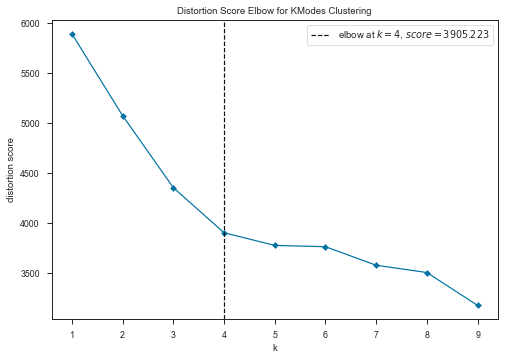

<AxesSubplot:title={'center':'Distortion Score Elbow for KModes Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
model=KModes()
visualizer= KElbowVisualizer(model, k=(1,10),timings=False)

visualizer.fit(X2_enc)
visualizer.show()

In [65]:
k_modes = KModes(n_clusters=4, init='Huang', n_init=10 ,max_iter=300, random_state=0)

clusters = k_modes.fit_predict(X2_enc)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/300, moves: 100, cost: 2870.0
Run 1, iteration: 2/300, moves: 67, cost: 2802.0
Run 1, iteration: 3/300, moves: 31, cost: 2802.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/300, moves: 331, cost: 2918.0
Run 2, iteration: 2/300, moves: 187, cost: 2897.0
Run 2, iteration: 3/300, moves: 66, cost: 2897.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/300, moves: 312, cost: 2735.0
Run 3, iteration: 2/300, moves: 105, cost: 2735.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/300, moves: 199, cost: 2839.0
Run 4, iteration: 2/300, moves: 64, cost: 2780.0
Run 4, iteration: 3/300, moves: 74, cost: 2780.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/300, moves: 221, cost: 2931.0
Run 5

In [66]:
centroids=k_modes.cluster_centroids_
centroids

array([[0, 0, 4, 1, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 1],
       [0, 0, 4, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1],
       [1, 0, 4, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0],
       [0, 0, 4, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0]], dtype=int32)

In [67]:
np.unique(k_modes.labels_,return_counts=True)

(array([0, 1, 2, 3], dtype=uint16), array([151, 164, 454, 360], dtype=int64))

In [68]:
X_kmodes= pd.DataFrame(X_pca)

In [69]:
X_kmodes.columns=['a','b']

In [70]:
X_kmodes["Cluster"] = k_modes.labels_

<Figure size 504x360 with 0 Axes>

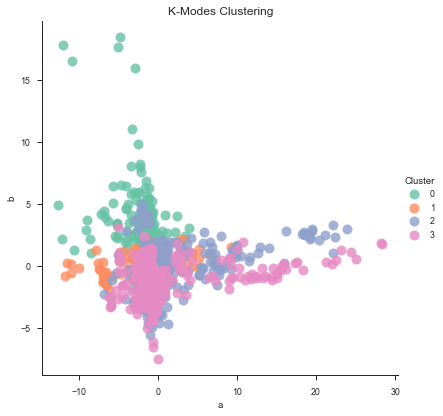

<Figure size 504x360 with 0 Axes>

In [71]:
sns.lmplot( x='a', y='b',data=X_kmodes ,hue='Cluster',palette='Set2',size=5.5 ,fit_reg =False, scatter_kws={'s':100})
#for cen in centroids:
    #plt.scatter(cen[0], cen[1], s=100, edgecolors='k')
plt.title('K-Modes Clustering', size=12)
plt.figure(figsize=(7,5))


In [72]:
X2_kmodes=X1.copy()
X2_kmodes['Cluster']= k_modes.labels_

In [73]:
clas_0_kmodes=X2_kmodes[X2_kmodes['genre_top']==0][X2_kmodes["Cluster"]==0].index
clas_1_kmodes=X2_kmodes[X2_kmodes['genre_top']==0][X2_kmodes["Cluster"]==1].index
clas_2_kmodes=X2_kmodes[X2_kmodes['genre_top']==0][X2_kmodes["Cluster"]==2].index
clas_3_kmodes=X2_kmodes[X2_kmodes['genre_top']==0][X2_kmodes["Cluster"]==3].index
old_0_kmodes=X2_kmodes[X2_kmodes['genre_top']==1][X2_kmodes["Cluster"]==0].index
old_1_kmodes=X2_kmodes[X2_kmodes['genre_top']==1][X2_kmodes["Cluster"]==1].index
old_2_kmodes=X2_kmodes[X2_kmodes['genre_top']==1][X2_kmodes["Cluster"]==2].index
old_3_kmodes=X2_kmodes[X2_kmodes['genre_top']==1][X2_kmodes["Cluster"]==3].index

In [74]:
print('Cluster 0: Classica:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_0_kmodes),len(old_0_kmodes),len(old_0_kmodes)+len(clas_0_kmodes)))
print('Cluster 1: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_1_kmodes),len(old_1_kmodes),len(old_1_kmodes)+len(clas_1_kmodes)))
print('Cluster 2: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_2_kmodes),len(old_2_kmodes),len(old_2_kmodes)+len(clas_2_kmodes)))
print('Cluster 3: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_3_kmodes),len(old_3_kmodes),len(old_3_kmodes)+len(clas_3_kmodes)))

Cluster 0: Classica:94,Old-Time/Historic:57, Total of:151
Cluster 1: Classical:159,Old-Time/Historic:5, Total of:164
Cluster 2: Classical:50,Old-Time/Historic:404, Total of:454
Cluster 3: Classical:316,Old-Time/Historic:44, Total of:360


In [75]:
for i, indexes in enumerate(clusters):
    print(i, X2.iloc[indexes,:5])

0 genre_top             Classical
roll_kurtosis_bins    0        
roll_max_bins         4        
roll_mean_bins        0        
roll_median_bins      0        
Name: 1, dtype: object
1 genre_top             Classical
roll_kurtosis_bins    0        
roll_max_bins         4        
roll_mean_bins        0        
roll_median_bins      0        
Name: 1, dtype: object
2 genre_top             Old-Time / Historic
roll_kurtosis_bins    0                  
roll_max_bins         4                  
roll_mean_bins        0                  
roll_median_bins      0                  
Name: 2, dtype: object
3 genre_top             Classical
roll_kurtosis_bins    0        
roll_max_bins         4        
roll_mean_bins        0        
roll_median_bins      0        
Name: 0, dtype: object
4 genre_top             Old-Time / Historic
roll_kurtosis_bins    0                  
roll_max_bins         4                  
roll_mean_bins        1                  
roll_median_bins      1                 

Name: 3, dtype: object
97 genre_top             Old-Time / Historic
roll_kurtosis_bins    0                  
roll_max_bins         4                  
roll_mean_bins        1                  
roll_median_bins      1                  
Name: 3, dtype: object
98 genre_top             Classical
roll_kurtosis_bins    0        
roll_max_bins         4        
roll_mean_bins        0        
roll_median_bins      0        
Name: 1, dtype: object
99 genre_top             Classical
roll_kurtosis_bins    0        
roll_max_bins         4        
roll_mean_bins        0        
roll_median_bins      0        
Name: 1, dtype: object
100 genre_top             Classical
roll_kurtosis_bins    0        
roll_max_bins         4        
roll_mean_bins        0        
roll_median_bins      0        
Name: 1, dtype: object
101 genre_top             Classical
roll_kurtosis_bins    0        
roll_max_bins         4        
roll_mean_bins        0        
roll_median_bins      0        
Name: 1, dtype: ob

Name: 2, dtype: object
204 genre_top             Old-Time / Historic
roll_kurtosis_bins    0                  
roll_max_bins         4                  
roll_mean_bins        0                  
roll_median_bins      0                  
Name: 2, dtype: object
205 genre_top             Old-Time / Historic
roll_kurtosis_bins    0                  
roll_max_bins         4                  
roll_mean_bins        0                  
roll_median_bins      0                  
Name: 2, dtype: object
206 genre_top             Old-Time / Historic
roll_kurtosis_bins    0                  
roll_max_bins         4                  
roll_mean_bins        0                  
roll_median_bins      0                  
Name: 2, dtype: object
207 genre_top             Old-Time / Historic
roll_kurtosis_bins    0                  
roll_max_bins         4                  
roll_mean_bins        0                  
roll_median_bins      0                  
Name: 2, dtype: object
208 genre_top             Old

Name: 2, dtype: object
338 genre_top             Old-Time / Historic
roll_kurtosis_bins    0                  
roll_max_bins         4                  
roll_mean_bins        0                  
roll_median_bins      0                  
Name: 2, dtype: object
339 genre_top             Old-Time / Historic
roll_kurtosis_bins    0                  
roll_max_bins         4                  
roll_mean_bins        0                  
roll_median_bins      0                  
Name: 2, dtype: object
340 genre_top             Old-Time / Historic
roll_kurtosis_bins    0                  
roll_max_bins         4                  
roll_mean_bins        0                  
roll_median_bins      0                  
Name: 2, dtype: object
341 genre_top             Old-Time / Historic
roll_kurtosis_bins    0                  
roll_max_bins         4                  
roll_mean_bins        0                  
roll_median_bins      0                  
Name: 2, dtype: object
342 genre_top             Old

693 genre_top             Classical
roll_kurtosis_bins    0        
roll_max_bins         4        
roll_mean_bins        0        
roll_median_bins      0        
Name: 1, dtype: object
694 genre_top             Classical
roll_kurtosis_bins    0        
roll_max_bins         4        
roll_mean_bins        0        
roll_median_bins      0        
Name: 0, dtype: object
695 genre_top             Classical
roll_kurtosis_bins    0        
roll_max_bins         4        
roll_mean_bins        0        
roll_median_bins      0        
Name: 1, dtype: object
696 genre_top             Old-Time / Historic
roll_kurtosis_bins    0                  
roll_max_bins         4                  
roll_mean_bins        1                  
roll_median_bins      1                  
Name: 3, dtype: object
697 genre_top             Old-Time / Historic
roll_kurtosis_bins    0                  
roll_max_bins         4                  
roll_mean_bins        1                  
roll_median_bins      1       

882 genre_top             Old-Time / Historic
roll_kurtosis_bins    0                  
roll_max_bins         4                  
roll_mean_bins        1                  
roll_median_bins      1                  
Name: 3, dtype: object
883 genre_top             Classical
roll_kurtosis_bins    0        
roll_max_bins         4        
roll_mean_bins        0        
roll_median_bins      0        
Name: 1, dtype: object
884 genre_top             Old-Time / Historic
roll_kurtosis_bins    0                  
roll_max_bins         4                  
roll_mean_bins        0                  
roll_median_bins      0                  
Name: 2, dtype: object
885 genre_top             Old-Time / Historic
roll_kurtosis_bins    0                  
roll_max_bins         4                  
roll_mean_bins        0                  
roll_median_bins      0                  
Name: 2, dtype: object
886 genre_top             Classical
roll_kurtosis_bins    0        
roll_max_bins         4        
ro

Name: 2, dtype: object
969 genre_top             Old-Time / Historic
roll_kurtosis_bins    0                  
roll_max_bins         4                  
roll_mean_bins        0                  
roll_median_bins      0                  
Name: 2, dtype: object
970 genre_top             Old-Time / Historic
roll_kurtosis_bins    0                  
roll_max_bins         4                  
roll_mean_bins        0                  
roll_median_bins      0                  
Name: 2, dtype: object
971 genre_top             Old-Time / Historic
roll_kurtosis_bins    0                  
roll_max_bins         4                  
roll_mean_bins        0                  
roll_median_bins      0                  
Name: 2, dtype: object
972 genre_top             Old-Time / Historic
roll_kurtosis_bins    0                  
roll_max_bins         4                  
roll_mean_bins        0                  
roll_median_bins      0                  
Name: 2, dtype: object
973 genre_top             Old

1090 genre_top             Classical
roll_kurtosis_bins    0        
roll_max_bins         4        
roll_mean_bins        0        
roll_median_bins      0        
Name: 1, dtype: object
1091 genre_top             Classical
roll_kurtosis_bins    0        
roll_max_bins         4        
roll_mean_bins        0        
roll_median_bins      0        
Name: 1, dtype: object
1092 genre_top             Old-Time / Historic
roll_kurtosis_bins    0                  
roll_max_bins         4                  
roll_mean_bins        0                  
roll_median_bins      0                  
Name: 2, dtype: object
1093 genre_top             Old-Time / Historic
roll_kurtosis_bins    0                  
roll_max_bins         4                  
roll_mean_bins        0                  
roll_median_bins      0                  
Name: 2, dtype: object
1094 genre_top             Old-Time / Historic
roll_kurtosis_bins    0                  
roll_max_bins         4                  
roll_mean_bins   

In [84]:
X2_kmodes['roll_min_bins']=pd.cut(X1['roll_min'].astype(int),5, right=False).cat.codes
X2_kmodes.head(2)

,genre_top,roll_kurtosis,roll_max,roll_mean,roll_median,roll_min,roll_skew,roll_std,centr_kurtosis,centr_max,centr_mean,centr_median,centr_min,centr_skew,centr_std,Cluster,roll_min_bins
0,0,27.346659,9517.675781,900.405640,667.529297,247.631836,5.201740,1216.515747,40.157177,5693.858887,531.164001,445.917084,249.851807,5.489871,376.29248,1,0
1,0,27.429146,9496.142578,724.641357,473.730469,0.000000,5.282704,1287.398682,45.221325,5715.818359,462.206146,386.870026,0.000000,5.831337,378.36734,1,0


### K-Modes VALIDATION

In [ ]:
#calculate silhouette for different values of K
k_to_test = range(2,11,1) # [2,3,4, ..., 24]
silhouette_scores = {}

for k in k_to_test:
    model_kmeans_k = KModes( n_clusters = k )
    model_kmeans_k.fit(X2_enc)
    labels_k = model_kmeans_k.labels_
    score_k = metrics.silhouette_score(X2_enc, labels_k)
    silhouette_scores[k] = score_k
    print("Tested kMeans with k = %d\tSS: %5.4f" % (k, score_k))
    
print("Done!")

In [ ]:
#convert dict values to a list 
sil_v = []
for i in silhouette_scores.values():
    sil_v.append(i)

In [ ]:
#Silhouette metric graph
plt.figure(figsize = (10,5))
plt.plot(sil_v)
plt.xticks(range(0,9,1), silhouette_scores.keys())
plt.title("Silhouette Metric")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.axvline(1, color = "r")
#plt.figtext(0.3,0.55,'[ K = 3 ]\n[ SS: 0.3074 ] ')
plt.show()


In [ ]:
#visualize silhouette for K=3
from yellowbrick.cluster import SilhouetteVisualizer

model = KModes(4)
visualizer = SilhouetteVisualizer(model, colors = ['lightsalmon','blue','purple'])

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show()        #

In [ ]:
#visualize silhouette for K=3
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(3)
visualizer = SilhouetteVisualizer(model, colors = ['lightsalmon','blue','purple'])

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.show()        #

In [ ]:
#visualize silhouette for K=3
from yellowbrick.cluster import SilhouetteVisualizer

model = xmeans.xmeans(7)
visualizer = SilhouetteVisualizer(model, colors = ['lightsalmon','blue','purple'])

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.show()   